<center><h1>Моделирование распространения эпидемии</h1></center>

In [ ]:
import numpy as np
from collections import defaultdict

%matplotlib inline 
import matplotlib.pylab as plt
plt.style.use('ggplot')

In [ ]:
N = 1000
MAX_DAYS = 200
probs = np.linspace(start=0, stop=1, num=100)

In [ ]:
first = 0.00109
third = 0.00039
sixth = 0.000185
eighth = 0.000140
tenth = 0.000102

Ns = (1000, 3000, 6000, 8000, 10000)
lim_probs = [first, third, sixth, eighth, tenth]

def check_condition(lim_proba, proba, mean_value):
    return not (proba > lim_proba and mean_value < 3)

# №1

In [ ]:
stata = defaultdict(list)

for proba in probs:
    sick = 1
    healthy = N - sick
    
    for current_day in range(1, MAX_DAYS+1):
        chance_to_get_sick = 1 - (1 - proba)**sick
        chance_per_person = np.random.uniform(low=0, high=1, size=healthy)
        
        sick = (chance_per_person < chance_to_get_sick).sum()
        healthy = N - sick
        
        stata[proba].append(sick)

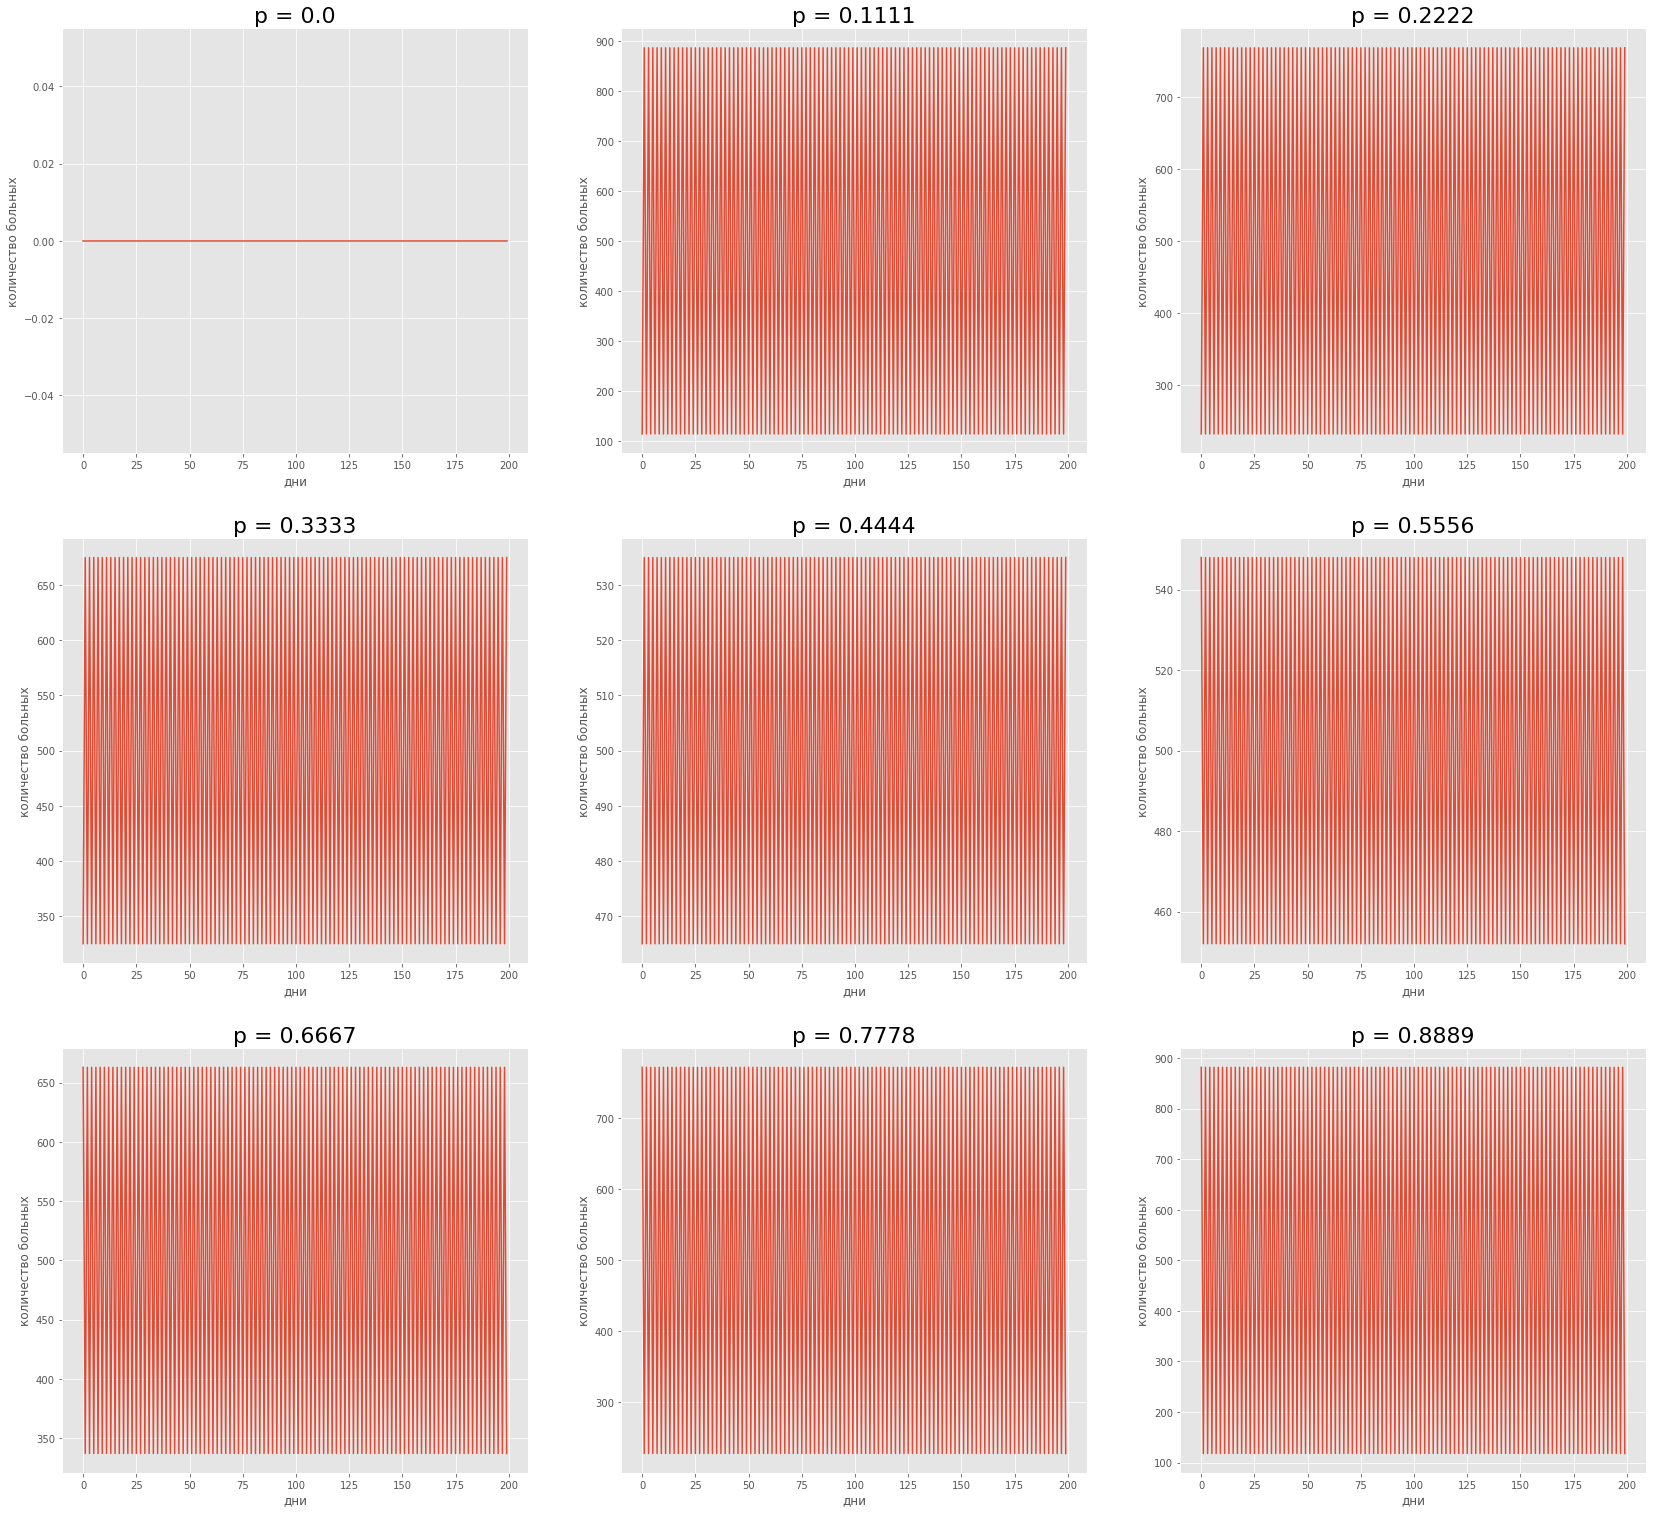

In [ ]:
NUM = 3

fig, axes = plt.subplots(NUM, NUM, figsize=(20, 17))
plt.subplots_adjust(left=-0.2, bottom=-0.3)
for i, ax in enumerate(axes.flatten()): 
    idx = int(i * len(probs) / (NUM**2))
    proba = probs[idx]
    
    ax.set_title(f'p = {round(proba, 4)}', fontsize=22)
    ax.set_xlabel('дни')
    ax.set_ylabel('количество больных')
    ax.plot(range(MAX_DAYS), stata[proba])

## При малых p

In [ ]:
small_stata = defaultdict(list)
small_probs = np.linspace(0, 0.02, 100)
MAX_DAYS = 100

for proba in small_probs:
    sick = 1
    healthy = N - sick
    
    for current_day in range(1, MAX_DAYS+1):
        chance_to_get_sick = 1 - (1 - proba)**sick
        chance_per_person = np.random.uniform(low=0, high=1, size=healthy)
        
        sick = (chance_per_person < chance_to_get_sick).sum()
        healthy = N - sick
        
        small_stata[proba].append(sick)

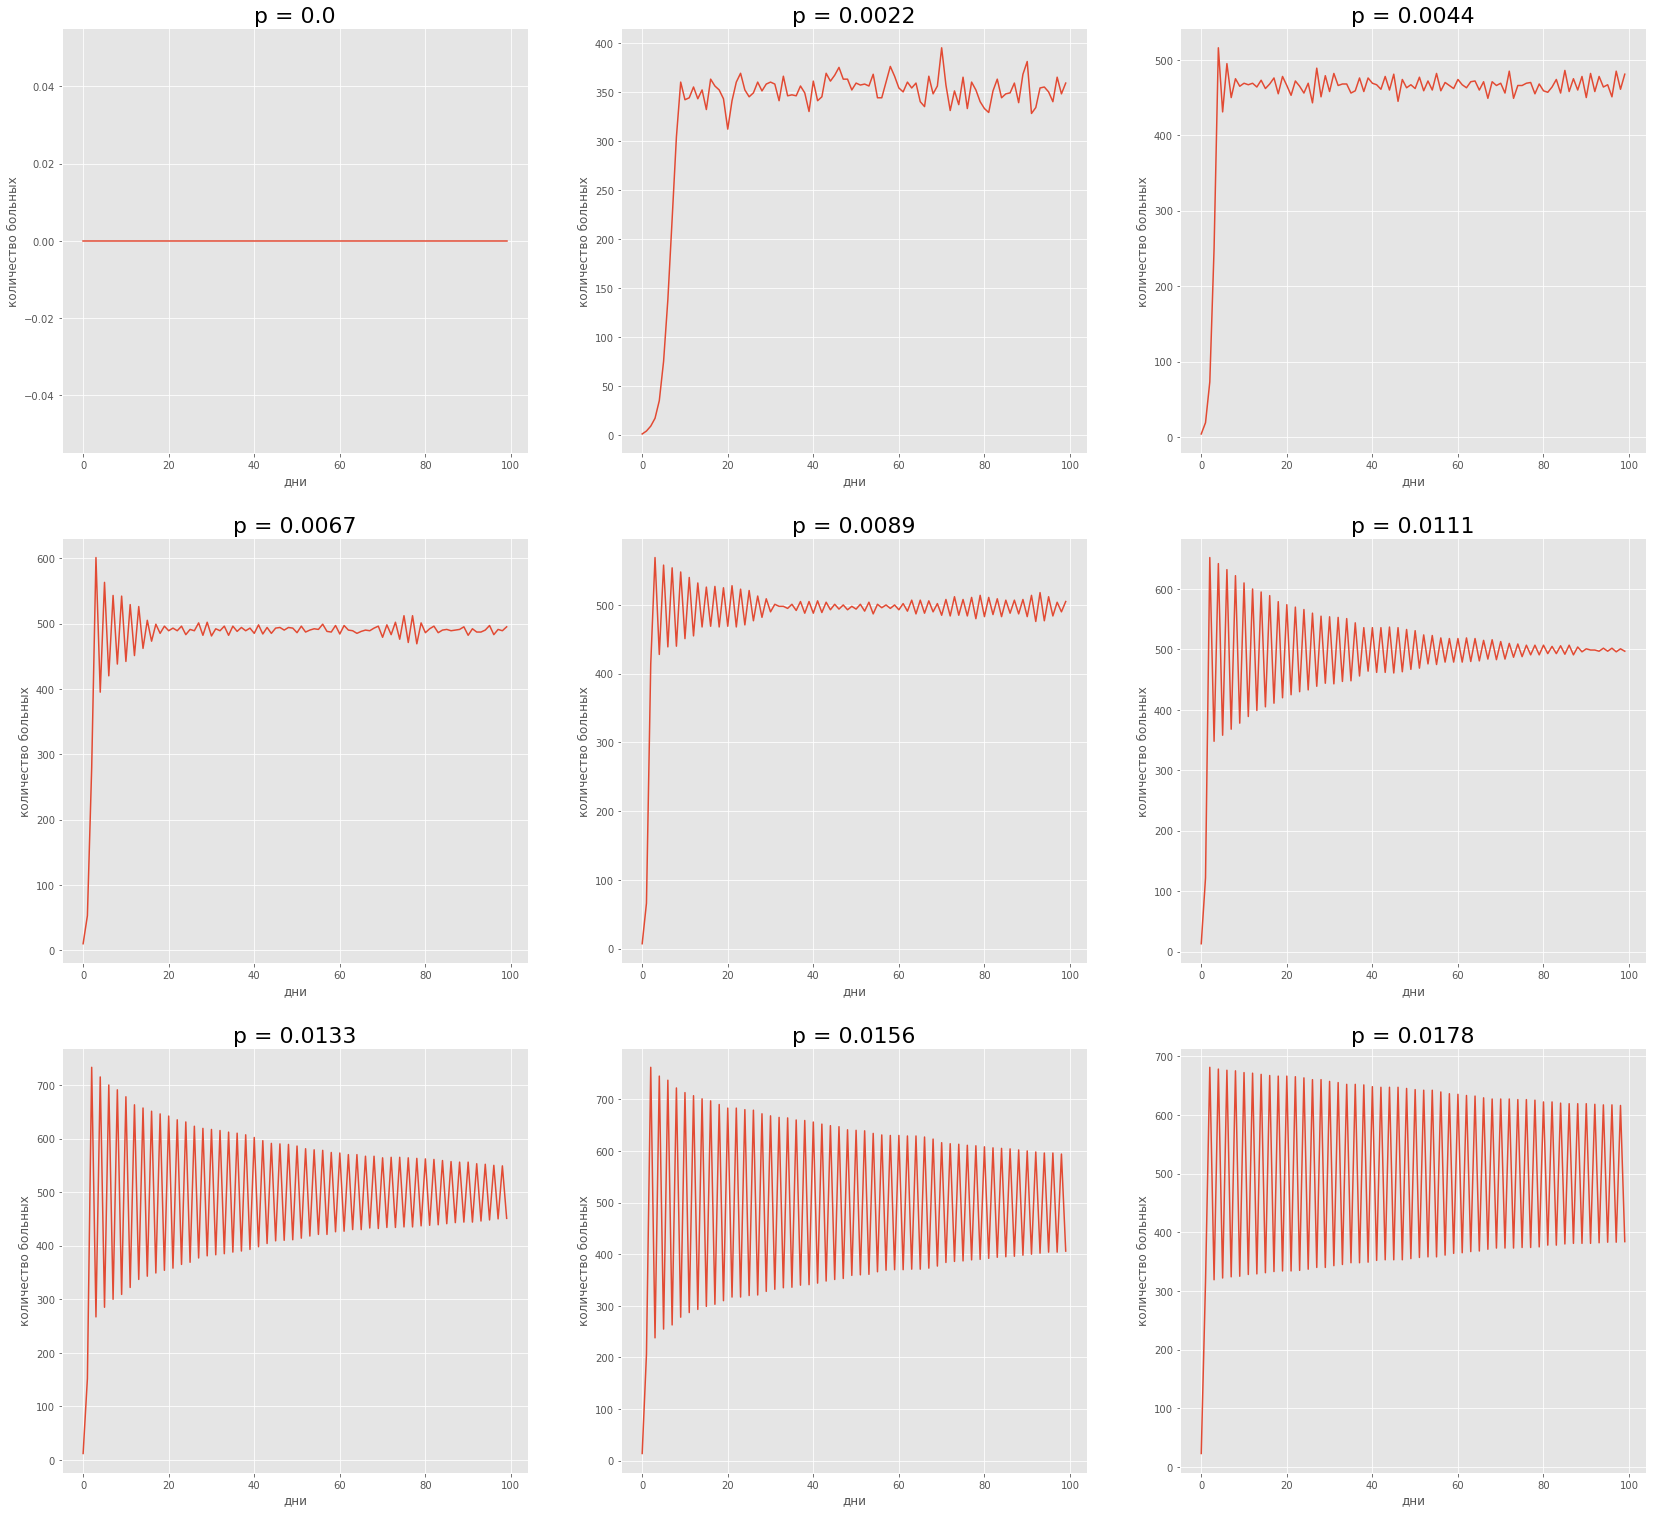

In [ ]:
NUM = 3
fig, axes = plt.subplots(NUM, NUM, figsize=(20, 17))
plt.subplots_adjust(left=-0.2, bottom=-0.3)


for i, ax in enumerate(axes.flatten()): 
    idx = int((i) * len(small_probs) / (NUM**2))
    proba = small_probs[idx]
    
    ax.set_title(f'p = {round(proba, 4)}', fontsize=22)
    ax.set_xlabel('дни')
    ax.set_ylabel('количество больных')
    ax.plot(range(MAX_DAYS), small_stata[proba])

## Усредненная по дням

In [ ]:
MAX_ITER = 10
MAX_DAYS = 1000
temp_stata = defaultdict(list)
cumulative_stata = defaultdict(list)
probs = np.linspace(0, 0.005, 120)

for _ in range(MAX_ITER):
    for proba in probs:
        sick = 1
        healthy = N - sick

        for current_day in range(1, MAX_DAYS+1):
            chance_to_get_sick = 1 - (1 - proba)**sick
            chance_per_person = np.random.uniform(low=0, high=1, size=healthy)

            sick = (chance_per_person < chance_to_get_sick).sum()
            healthy = N - sick

            temp_stata[proba].append(sick)
        
        if not isinstance(cumulative_stata[proba], np.ndarray):
            cumulative_stata[proba] = np.zeros(shape=len(temp_stata[proba]))
            
        cumulative_stata[proba] = cumulative_stata[proba] + temp_stata[proba]
        temp_stata[proba].clear()
        

for proba in probs:  #  impossible to do w/o loop:(
    cumulative_stata[proba] = cumulative_stata[proba] / MAX_ITER
    
avg_stata = np.array(list(cumulative_stata.values()))

In [ ]:
avg_stata # each row stands for proba

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e-01, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [5.100e+00, 2.540e+01, 1.151e+02, ..., 4.731e+02, 4.754e+02,
        4.723e+02],
       [4.500e+00, 2.050e+01, 9.070e+01, ..., 4.765e+02, 4.735e+02,
        4.753e+02],
       [4.800e+00, 2.370e+01, 1.038e+02, ..., 4.746e+02, 4.769e+02,
        4.786e+02]])

In [ ]:
STEP = 6
real_avg_stata = np.zeros_like(avg_stata)

for i in range(STEP, avg_stata.shape[1]-STEP):
    np.copyto(real_avg_stata[:, i], (avg_stata[:, (i-STEP):i].sum(axis=1) / STEP))

In [ ]:
real_avg_stata = real_avg_stata[STEP:(len(avg_stata)-STEP)]

In [ ]:
avg_dict = {probs[i]: real_avg_stata[i] for i in range((len(probs)-2*STEP))}

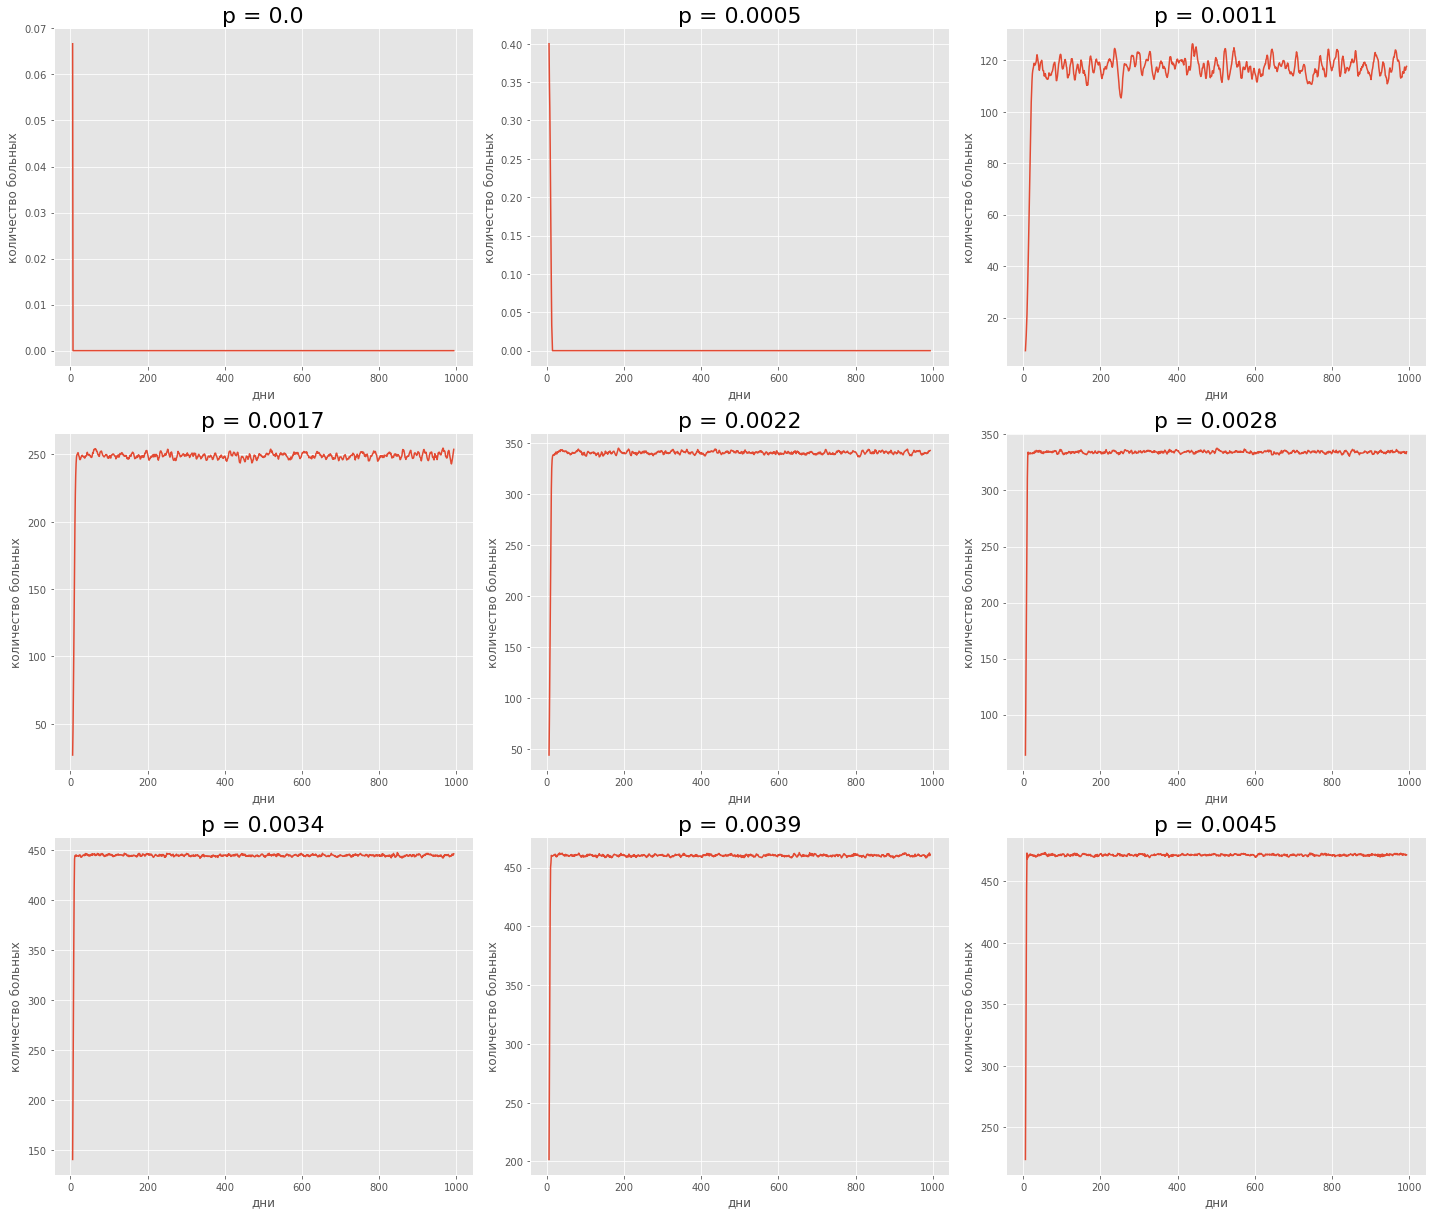

In [ ]:
NUM = 3
SHIFT = 1

fig, axes = plt.subplots(NUM, NUM, figsize=(20, 17))
plt.subplots_adjust(left=-0.2, bottom=-0.3)

for i, ax in enumerate(axes.flatten()): 
    idx = int((i) * len(probs) / (NUM**2))
    proba = probs[idx]
    
    ax.set_title(f'p = {round(proba, 4)}', fontsize=22)
    ax.set_xlabel('дни')
    ax.set_ylabel('количество больных')
    ax.plot(range(STEP*SHIFT, (MAX_DAYS-SHIFT*STEP)), avg_dict[proba][(STEP*SHIFT):(MAX_DAYS-SHIFT*STEP)])
    
plt.tight_layout()

# №3

In [ ]:
probs = np.linspace(0, 0.002, 30)

def calc_avg(max_day, N=1000, lim_proba=0.00109, conver_stata=None, temp_stata=None):
    conver_stata = defaultdict(list) if conver_stata is None else conver_stata
    temp_stata = defaultdict(list) if temp_stata is None else temp_stata
    
    for proba in probs:
        sick = 1
        healthy = N - sick

        for current_day in range(1, max_day+1):
            chance_to_get_sick = 1 - (1 - proba)**sick
            chance_per_person = np.random.uniform(low=0, high=1, size=healthy)

            sick = (chance_per_person < chance_to_get_sick).sum()
            healthy = N - sick

            temp_stata[proba].append(sick)
  
        if check_condition(lim_proba, proba, np.mean(temp_stata[proba][-100:])):
            conver_stata[proba] = np.mean(temp_stata[proba][-100:])
        
    # plot
    plt.figure(figsize=(10, 6))
    plt.plot(list(conver_stata.keys()), list(conver_stata.values()))
    plt.title(f'предельная вероятность при N == {N}: {lim_proba}')
    plt.tight_layout()

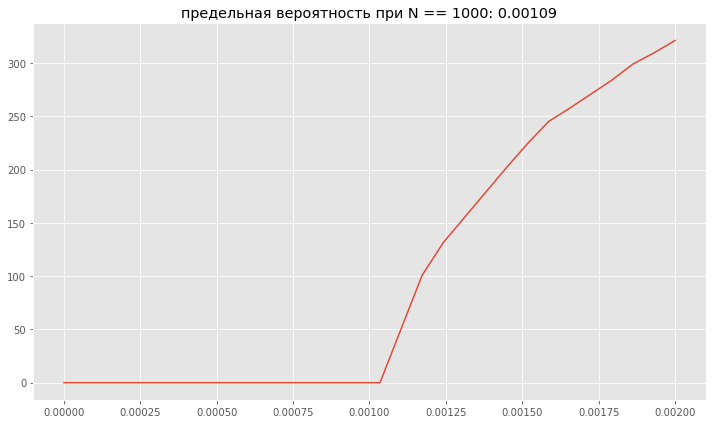

In [ ]:
calc_avg(max_day=1000, N=1000);

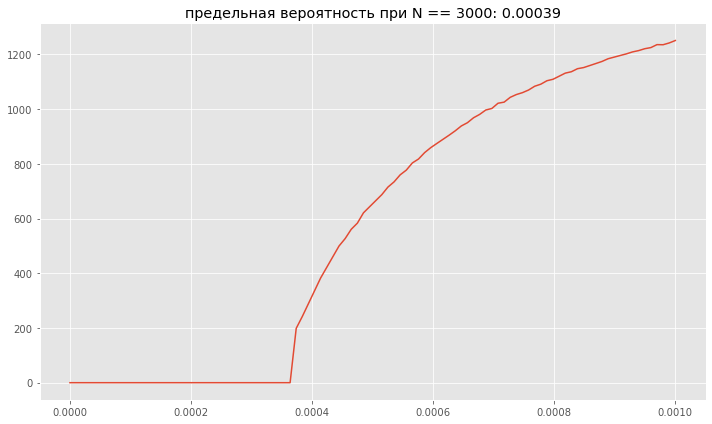

In [ ]:
probs = np.linspace(0, 0.001, 100)

calc_avg(1000, 3000, third)

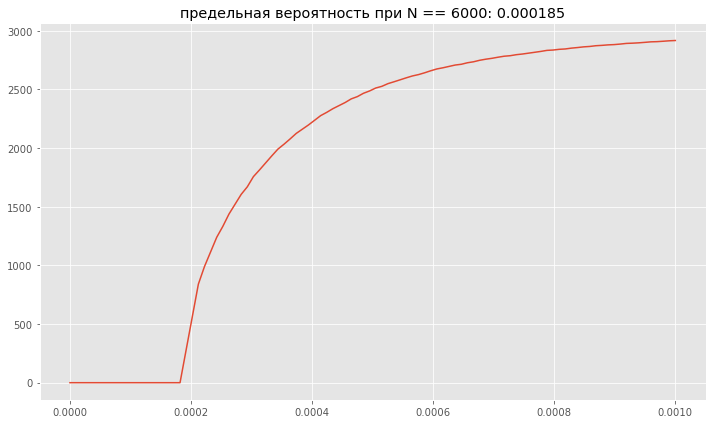

In [ ]:
probs = np.linspace(0, 0.001, 100)

calc_avg(1000, 6000, sixth)

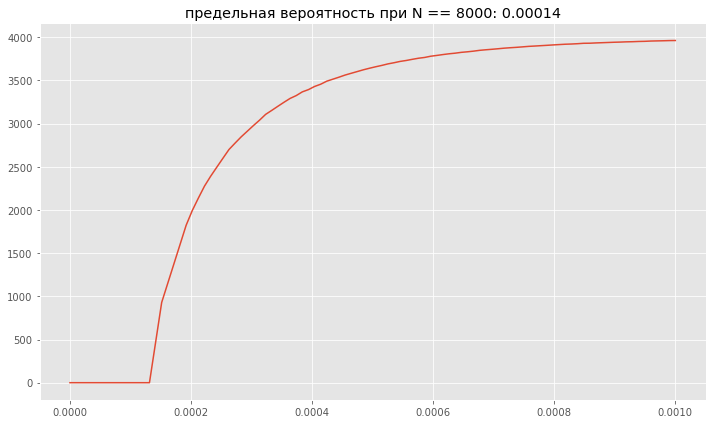

In [ ]:
probs = np.linspace(0, 0.001, 100)

calc_avg(1000, 8000, eighth)

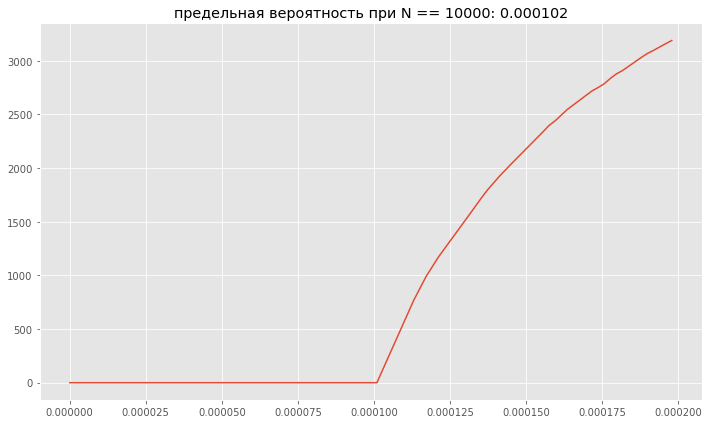

In [ ]:
probs = np.linspace(0, 0.0002, 100)

calc_avg(1000, 10000, tenth)

## В двойном логарифме

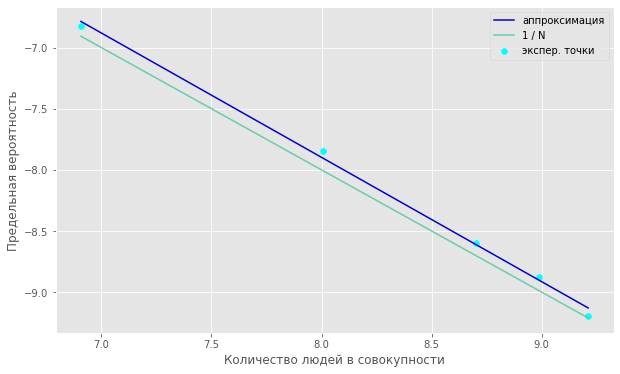

In [ ]:
plt.figure(figsize=(10, 6))

# double ln
coefs = np.polyfit(np.log(Ns), np.log(lim_probs), 1)
log_probs_pred = coefs[0]*np.log(Ns) + coefs[1]
plt.plot(np.log(Ns), log_probs_pred, c='mediumblue', label='аппроксимация')
plt.scatter(np.log(Ns), np.log(lim_probs), color='aqua', label='экспер. точки')


plt.plot(np.log(Ns),np.log(1 / np.array(Ns)), color='mediumaquamarine', label='1 / N')

plt.xlabel('Количество людей в совокупности')
plt.ylabel('Предельная вероятность');
plt.legend()